In [1]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import cv2
import os
from random import shuffle
from tqdm.auto import tqdm
import keras


# Comentario pra vida: numpay array shape = (LINHAS, COLUNAS)

IMG_SIZE = 64
LEARNING_RATE = 0.001

MODEL_NAME = f"LR-LPR-({IMG_SIZE_LINHA}, {IMG_SIZE_COLUNA})-{LEARNING_RATE}-HLP-dataset"
pathInfo = np.load("hlp-locations-final.npy") # pathInfo -> [img path, img label]


Using TensorFlow backend.


NameError: name 'IMG_SIZE_LINHA' is not defined

In [7]:
def create_labels(img_name):
    """
    Pega o nome da imagem, separa os numeros da placa e gera um array para cada numero de 10 posições binarias (0 ou 1).
          0  1  2  3  4  5  6  7  8  9      
    0 = [ 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
    1 = [ 0, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]
    2 = [ 0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]
    3 = [ 0, 0, 0, 1, 0, 0, 0, 0, 0, 0 ]
    4 = [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0 ]
    5 = [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ]
    6 = [ 0, 0, 0, 0, 0, 0, 1, 0, 0, 0 ]
    7 = [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0 ]
    8 = [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 0 ]
    9 = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1 ]
    :param img: nome do arquivo da imagem.
    :return: um array de arrays, representando os numeros da placa.
    """
    label = [ [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
              [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
            ]
    for index, number in enumerate(img_name.split('.')[0]):
        label[index][int(number)] = 1
    return label

In [8]:
def create_train_data():
    training_data = []
    for img_info in tqdm(pathInfo):
        img_path = img_info[0]
        img_name = img_info[1]
        label = create_labels(img_name)
        img = cv2.resize(cv2.imread(os.path.join(TRAIN_DIR, img_path), cv2.IMREAD_GRAYSCALE), (IMG_SIZE_COLUNA, IMG_SIZE_LINHA))
        numbers_array = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
        
        for linha in range(IMG_SIZE_LINHA):
            tmp = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
            for coluna in range(24, IMG_SIZE_COLUNA):
                if coluna <= 29:
                    tmp[0].append(img[linha][coluna])
                elif coluna <= 35:
                    tmp[1].append(img[linha][coluna])
                elif coluna <= 41:
                    tmp[2].append(img[linha][coluna])
                elif coluna <= 47:
                    tmp[3].append(img[linha][coluna])
                else:
                    continue
            numbers_array[0].append(tmp[0])
            numbers_array[1].append(tmp[1])
            numbers_array[2].append(tmp[2])
            numbers_array[3].append(tmp[3])
            
        # numbers_array[0] = np.array(numbers_array[0])
        # numbers_array[1] = np.array(numbers_array[1])
        # numbers_array[2] = np.array(numbers_array[2])
        # numbers_array[3] = np.array(numbers_array[3])
        
        for index, number_img in enumerate(numbers_array):
            training_data.append([np.array(number_img), np.array(label[index])])
    
    shuffle(training_data)
    np.save(f"training_data-30-03-({IMG_SIZE_LINHA}, {IMG_SIZE_COLUNA})-{LEARNING_RATE}.npy", training_data)
    return training_data
        
        

In [9]:
def create_test_data():
    testing_data = []
    for img_name in tqdm(os.listdir(TEST_DIR)):
        img = cv2.resize(cv2.imread(os.path.join(TEST_DIR, img_name), cv2.IMREAD_GRAYSCALE), (IMG_SIZE_COLUNA, IMG_SIZE_LINHA))
        numbers_array = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
        
        for linha in range(IMG_SIZE_LINHA):
            tmp = [[],[],[],[]] # [ [IMG_NUM1], [IMG_NUM2], [IMG_NUM3], [IMG_NUM4]]
            for coluna in range(24, IMG_SIZE_COLUNA):
                if coluna <= 29:
                    tmp[0].append(img[linha][coluna])
                elif coluna <= 35:
                    tmp[1].append(img[linha][coluna])
                elif coluna <= 41:
                    tmp[2].append(img[linha][coluna])
                elif coluna <= 47:
                    tmp[3].append(img[linha][coluna])
                else:
                    continue
            numbers_array[0].append(tmp[0])
            numbers_array[1].append(tmp[1])
            numbers_array[2].append(tmp[2])
            numbers_array[3].append(tmp[3])
            
        # numbers_array[0] = np.array(numbers_array[0])
        # numbers_array[1] = np.array(numbers_array[1])
        # numbers_array[2] = np.array(numbers_array[2])
        # numbers_array[3] = np.array(numbers_array[3])
        for number_img in numbers_array:
            testing_data.append([np.array(number_img), img_name.split('.')[0]])
        np.save(f"testing_data-30-03-({IMG_SIZE_LINHA}, {IMG_SIZE_COLUNA})-{LEARNING_RATE}.npy", testing_data)
        return testing_data

In [10]:
if os.path.exists(f"training_data-30-03-({IMG_SIZE_LINHA}, {IMG_SIZE_COLUNA})-{LEARNING_RATE}.npy"):
    training_data = np.load(f"training_data-30-03-({IMG_SIZE_LINHA}, {IMG_SIZE_COLUNA})-{LEARNING_RATE}.npy")
    print("Successfully Loaded.")
else:
    training_data = create_train_data()
    print("Successfully created")

Successfully Loaded.


<Figure size 432x288 with 0 Axes>

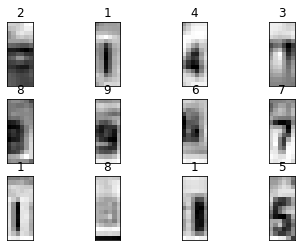

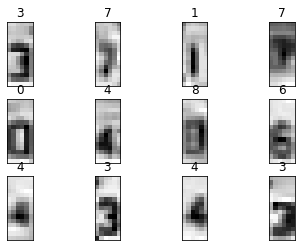

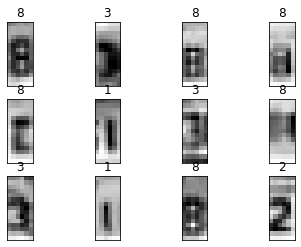

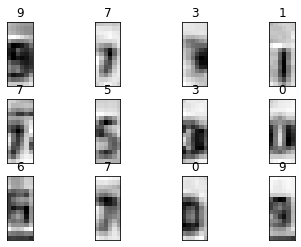

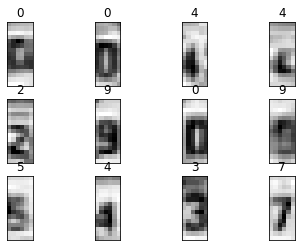

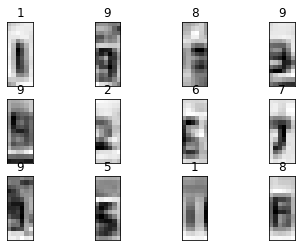

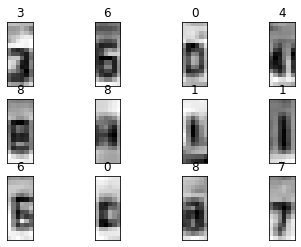

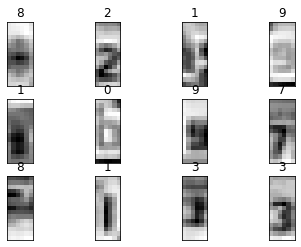

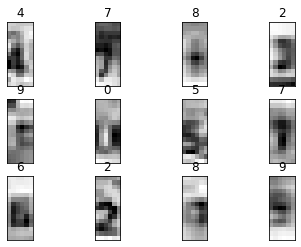

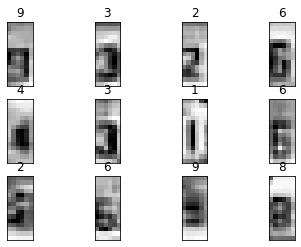

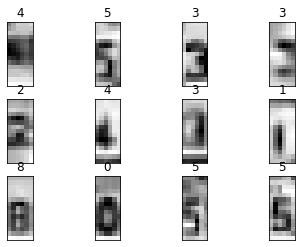

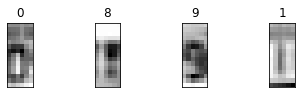

In [11]:
"""
    Demonstração do recorte das imagens.
"""
fig = plt.figure()
for index, num in enumerate(training_data):
    if index % 12 == 0:
        fig = plt.figure()
    img_data = num[0]
    img_label = num[1].argmax()

    y = fig.add_subplot(3, 4, (index)%12 + 1)
    y.imshow(img_data, cmap="gray")
    plt.title(img_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if index+1 % 12 == 0:
        plt.show()
plt.show()

In [8]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
# {64, 64, 128,128, 256,256, 512, 512}
convnet = input_data(shape=[None, IMG_SIZE_LINHA, 6, 1], name='input')

convnet = conv_2d(convnet, 64, 2, activation='relu', weights_init="xavier") # 64
convnet = conv_2d(convnet, 64, 2, activation='relu', weights_init="xavier") # 64
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu', weights_init="xavier") # 128
convnet = conv_2d(convnet, 128, 2, activation='relu', weights_init="xavier") # 128
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 256, 2, activation='relu', weights_init="xavier") # 256
convnet = conv_2d(convnet, 256, 2, activation='relu', weights_init="xavier") # 256
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu', weights_init="xavier") # 512
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu', weights_init="xavier") # 512
convnet = max_pool_2d(convnet, 2)


convnet = fully_connected(convnet, 1024, activation='relu', weights_init=tflearn.initializations.truncated_normal(stddev=0.005))
convnet = dropout(convnet, 0.5)
convnet = fully_connected(convnet, 2048, activation='relu', weights_init=tflearn.initializations.truncated_normal(stddev=0.005))
convnet = dropout(convnet, 0.5)

convnet = fully_connected(convnet, 10, activation='softmax', weights_init="xavier")
convnet = regression(convnet, optimizer='adam', learning_rate=LEARNING_RATE, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')



curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Scipy not supported!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [27]:
if os.path.exists(f"{MODEL_NAME}.meta"):
    model.load()
    print("Modelo Carregado Com Sucesso!")

In [9]:
train = training_data[:-27]
test = training_data[-27:]
print(train[:3])
X = np.array([data[0] for data in train])
print(X[:3])
X = X.reshape(-1, IMG_SIZE_LINHA, 6, 1)
print(X[:3])


Y = [data[1] for data in train]

test_X = np.array([data[0] for data in test])
test_X = test_X.reshape(-1, IMG_SIZE_LINHA, 6, 1)
test_Y = [data[1] for data in test]


[[array([[100, 100,  99, 102, 110, 112],
       [ 95,  97, 100, 103, 108, 108],
       [ 85,  93, 103, 106, 103, 103],
       [ 84,  90,  97,  99,  96,  98],
       [ 88,  88,  88,  87,  88,  92],
       [ 74,  73,  71,  69,  69,  74],
       [ 55,  55,  53,  50,  48,  53],
       [ 63,  64,  69,  68,  61,  60],
       [ 70,  73,  85,  85,  73,  68],
       [ 64,  65,  68,  67,  62,  64],
       [ 61,  60,  56,  54,  54,  62],
       [ 66,  65,  61,  60,  62,  68],
       [ 71,  69,  66,  65,  66,  70],
       [ 71,  70,  67,  65,  65,  67],
       [ 72,  70,  67,  65,  64,  65]], dtype=uint8)
  array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])]
 [array([[ 93, 101, 105, 104, 104, 106],
       [102, 106, 107, 106, 105, 105],
       [115, 115, 115, 112, 109, 107],
       [127, 132, 137, 130, 122, 117],
       [118, 116, 107, 113, 118, 117],
       [104,  97,  69,  90, 110, 114],
       [ 99,  95,  58,  82, 105, 111],
       [101,  94,  53,  80, 106, 114],
       [105,  95,  52,  80, 109, 116],
     

In [12]:
model.fit({'input': X}, {'targets': Y}, n_epoch=100,
          validation_set=({'input': test_X}, {'targets': test_Y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 205  | total loss: 20.10259 | time: 0.314s
| Adam | epoch: 103 | loss: 20.10259 - acc: 0.1270 -- iter: 064/109
Training Step: 206  | total loss: 20.14307 | time: 1.499s
| Adam | epoch: 103 | loss: 20.14307 - acc: 0.1252 | val_loss: 20.46742 - val_acc: 0.1111 -- iter: 109/109
--


In [11]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\skzt\PycharmProjects\tcc\test\LR-LPR-(15, 50)-0.01 is not in all_model_checkpoint_paths. Manually adding it.


In [22]:
del training_data
